In [1]:
# %% [markdown]

"""
Homework:

The folder '~//data//homework' contains a folder 'Data', containing hand-digits of letters a-z stored in .txt.

Try to establish a network to classify the digits.

`dataLoader.py` offers APIs for loading data.
"""
# %%
import dataLoader as dl

features,labels=dl.readData(r'../data/homework/Data')


In [2]:
labels1=[]
for label in labels:
    labels1.append(dl.letter2Number(label))

In [3]:
# 分离train与test
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels1, test_size=.2, random_state=1)

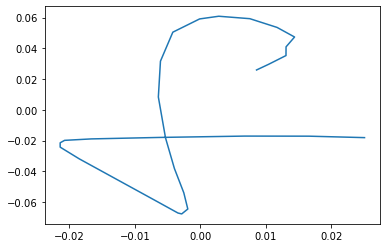

In [4]:
# %%
import matplotlib.pyplot as plt
plt.plot(features[5,0:30],features[5,30:])
plt.suptitle="Real: "+labels[5]
plt.show()


In [5]:
# %%
# 共26类图片，0-25如下：
class_names = ['a', 'b', 'c', 'd', 'e','f', 'g', 'h', 'i', 'j'
               'k', 'l', 'm', 'n', 'o','p', 'q', 'r', 's', 't','u', 'v', 'w', 'x', 'y','z']


In [6]:
# %%
# 训练集包含60000张28*28的图片
features.shape


(3874, 60)

In [7]:
# 
len(labels1)

3874

In [8]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26)
])

In [10]:
# model.summary()

In [11]:
# %%
# 编译模型
# 优化器选择adam（不知道选啥的时候用adam就完事了）
# 损失函数选用SparseCategoricalCrossentropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# labels1

In [13]:
# %%
# fit模型，开始训练啦！
model.fit(np.array(features_train), np.array(labels_train), epochs=20, batch_size=16)

Epoch 1/20
194/194 [==============================] - 0s 758us/step - loss: 3.0457 - accuracy: 0.2417
Epoch 2/20
194/194 [==============================] - 0s 726us/step - loss: 2.3794 - accuracy: 0.5037
Epoch 3/20
194/194 [==============================] - 0s 731us/step - loss: 1.8924 - accuracy: 0.6263
Epoch 4/20
194/194 [==============================] - 0s 741us/step - loss: 1.6018 - accuracy: 0.6696
Epoch 5/20
194/194 [==============================] - 0s 746us/step - loss: 1.4262 - accuracy: 0.6812
Epoch 6/20
194/194 [==============================] - 0s 736us/step - loss: 1.3067 - accuracy: 0.7083
Epoch 7/20
194/194 [==============================] - 0s 726us/step - loss: 1.2196 - accuracy: 0.7260
Epoch 8/20
194/194 [==============================] - 0s 715us/step - loss: 1.1529 - accuracy: 0.7393
Epoch 9/20
194/194 [==============================] - 0s 742us/step - loss: 1.0961 - accuracy: 0.7490
Epoch 10/20
194/194 [==============================] - 0s 710us/step - loss: 1.053

In [24]:
# %%
# 测试模型
test_loss, test_acc = model.evaluate( np.array(features_test), np.array(labels_test), verbose=2)

print('\nTest accuracy:', test_acc)


25/25 - 0s - loss: 0.7346 - accuracy: 0.8219 - 29ms/epoch - 1ms/step

Test accuracy: 0.8219354748725891


In [26]:
# %%
# 这里直接接一个softmax把输出转化成概率
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
# %%
predictions = probability_model.predict(features_test)
# %%
predictions[0]
# %%
# argmax把输出最大概率的元素，得到结果
np.argmax(predictions[0])
# %%
labels_test[0]

24